# Lec 03. Linear Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

In [3]:
x_data = torch.Tensor([1, 2, 3, 4, 5])
y_data = torch.Tensor([2, 4, 6, 8, 10])

# 행렬로 변환
x = Variable(x_data.view(5, 1))
y = Variable(y_data.view(5, 1))

print(x)
print(y)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])


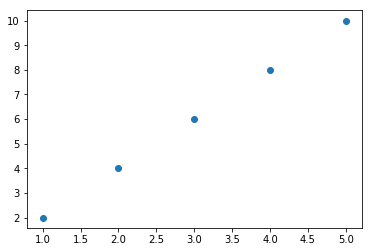

In [4]:
plt.scatter(x_data.numpy(), y.data.numpy())
plt.show()

## Define Model with Grad, nn.MSELoss

In [5]:
# weight initalization
w = Variable(torch.rand(1,1))
w

tensor([[0.1825]])

In [6]:
# y = w*x --> find w

w*x

tensor([[0.1825],
        [0.3649],
        [0.5474],
        [0.7298],
        [0.9123]])

In [7]:
loss = nn.MSELoss()  # loss function

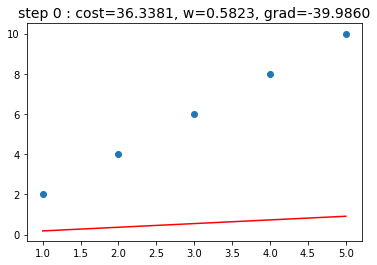

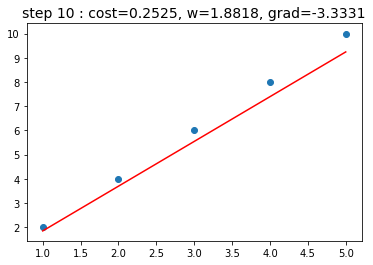

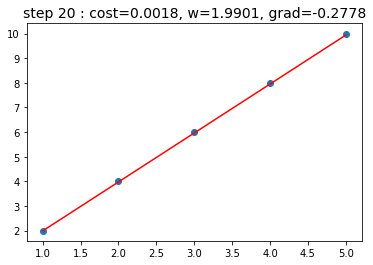

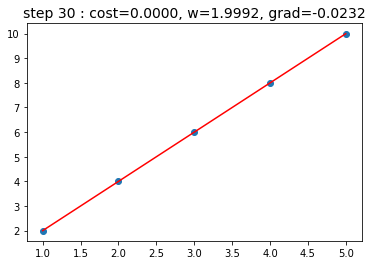

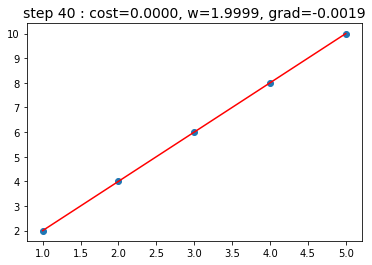

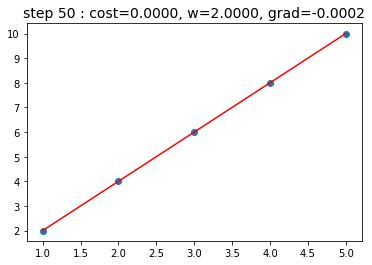

In [8]:
lr = 0.01

# 0.4
for step in range(51):
    pred = w*x
    cost = loss(pred, y)

    # MSE : (wx-y)^2 미분 시 2(wx-y)*x
    grad = torch.dot(2*(pred-y).view(-1), x.view(-1)).view(1) / len(x)  
    w -= lr*grad   
    
    if step % 10 == 0 :
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-')
        # w.size() = 1*1, grad.size() = 1
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % 
                  (step, cost.item(), w.data[0][0], grad.data[0]), fontdict={'size':14})
        plt.show()

In [9]:
# Test
x_new = Variable(torch.Tensor([7]))
y_new = w*x_new
y_new

tensor([[14.0000]])

## Define Model with nn.Linear, Optimizer

In [10]:
model = nn.Linear(1, 1, bias = False)  # input 1, output 1, bias 없음

model.weight    # weight initalization

Parameter containing:
tensor([[0.6449]], requires_grad=True)

In [11]:
# Optimizer 사용
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

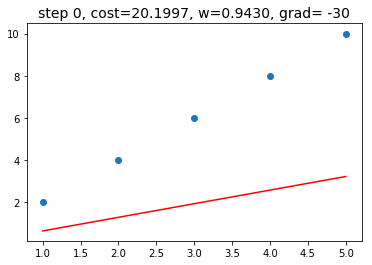

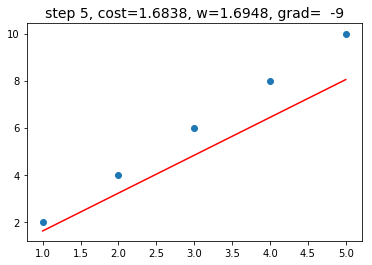

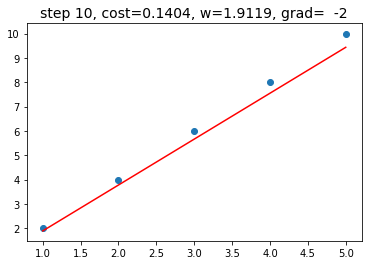

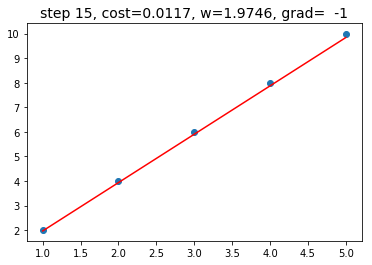

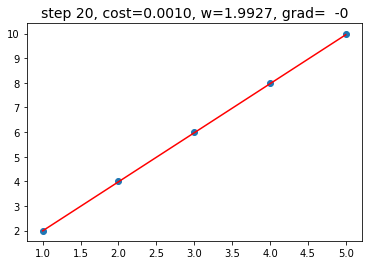

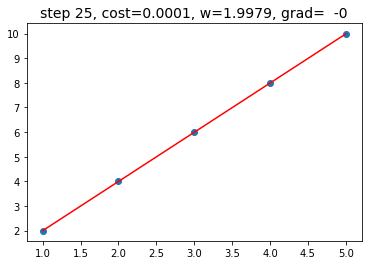

In [12]:
for step in range(30):
    pred = model(x)
    cost = loss(pred, y)
    
    optimizer.zero_grad()  # gradient 초기화 - 이전 step의 값이 영향을 미치지 않도록 매번 초기화
    cost.backward()
    optimizer.step()
    
    if step%5 == 0:
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-')
        plt.title('step %d, cost=%.4f, w=%.4f, grad=%4.f' % 
                  (step, cost.item(), model.weight.data[0][0], model.weight.grad), fontdict={'size':14})
        plt.show()

In [13]:
x_new = Variable(torch.Tensor([7]))
y_new = model(x_new)
y_new

tensor([13.9945], grad_fn=<SqueezeBackward3>)

In [14]:
model.weight

Parameter containing:
tensor([[1.9992]], requires_grad=True)

### 0.3.1

```
for step in range(100):
    pre = w*x
    cost = loss(pre, y)
    
    grad = 2*(pre-y).dot(x)/len(x)
    w -= lr*grad
    
    # w.size() = 1*1, grad.size() = 1
    
    if step % 20 == 0 :
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pre.data.numpy(), 'r-')    
        plt.title('step %d : cost=%.4f, w=%.4f, grad=%.4f' % 
                  (step, cost.data[0], w.data[0][0], grad.data[0]), fontdict={'size':15})
        plt.show()
```